### PA1


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, execute, Aer

In [49]:
IBMQ.load_account()
provider = IBMQ.get_provider(project = 'q-chemistry')
name = 'rome'
backend = provider.get_backend('ibmq_' + name)

/Users/pktsai/opt/anaconda3/envs/QChem/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [50]:
sim_backend = Aer.get_backend('qasm_simulator')


In [47]:
from random import randint


def DJ_QC(index = None):
    if not index: index = randint(0, 2)
    index %= 3
    
    qrx = QuantumRegister(4)
    qry = QuantumRegister(1)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qrx, qry, cr)
    
    qc.x(qry)
    qc.barrier()
    qc.h(qrx)
    qc.h(qry)
    
    qc.barrier()
    if index == 0:
        qc.i(qrx)
    if index == 1:
        qc.i(qrx)
        qc.x(qry)
    if index == 2:
        qc.cx(qrx, qry)
    qc.barrier()
    
    qc.h(qrx)
    qc.measure(qrx, cr)
    return index, qc

In [56]:
def DJ_get_counts(backend, index = None):
    idx, qc = DJ(index)
    job = execute(qc, backend, shots = 2048)
    return job.result().get_counts()

In [64]:
cnts = {'sim': [], 'real': []}
for i in range(3):
    cnts['sim'].append(DJ_get_counts(sim_backend, i))
# for i in range(3):
#     False or cnts['real'].append(DJ_get_counts(backend, i))


In [65]:
cnts

{'sim': [{'1111': 2048}, {'0000': 2048}, {'1111': 2048}], 'real': []}

In [61]:
tmp = cnts
print(cnts)

{'sim': [{'1111': 2048}, {'0000': 2048}, {'1111': 2048}], 'real': [{'0000': 1743, '0001': 14, '0010': 102, '0100': 117, '0101': 1, '0110': 41, '1000': 25, '1001': 2, '1100': 2, '1110': 1}, {'0000': 1657, '0001': 10, '0010': 104, '0011': 1, '0100': 149, '0110': 110, '0111': 1, '1000': 10, '1001': 2, '1010': 1, '1100': 1, '1110': 2}, {'0000': 73, '0001': 70, '0010': 65, '0011': 71, '0100': 187, '0101': 138, '0110': 105, '0111': 147, '1000': 76, '1001': 66, '1010': 66, '1011': 81, '1100': 253, '1101': 203, '1110': 174, '1111': 273}]}


In [67]:
from qiskit.visualization import plot_histogram

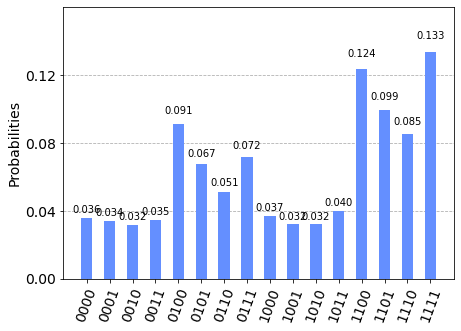

In [76]:
# for i in tmp['real']:

plot_histogram(tmp['real'][2])

### PA2

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer, IBMQ
import math, numpy as np 

In [3]:
desired_vector = [
    1 / math.sqrt(8) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(0, 1),
    1 / math.sqrt(8) * complex(0, 1),
    1 / math.sqrt(8) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(1, 1),
    1 / math.sqrt(8) * complex(0, 1)]
desired_vector = [j/ math.sqrt(sum([abs(i)**2 for i in desired_vector])) for j in desired_vector]

In [4]:
def Grover_QC(n_ite=1):
    qr= QuantumRegister(3, 'qr')
    anc_qr = QuantumRegister(1, 'ancilla')
    cr = ClassicalRegister(3, 'cr')
    qc = QuantumCircuit(qr, anc_qr, cr)

    qc.x(anc_qr)
    qc.h(anc_qr)
    qc.h(qr)
    
    for i in range(n_ite):
        qc.barrier()
        qc.x(qr[0])
        qc.mct(qr, anc_qr)
        qc.x(qr[0])

        qc.barrier()
        qc.h(qr)
        qc.x(qr)
        qc.barrier()
        qc.h(qr[2])
        qc.mct([qr[0], qr[1]], qr[2])
        qc.h(qr[2])
        qc.barrier()
        qc.x(qr)
        qc.h(qr)
    qc.measure(qr, cr)
    return qc
#     qc.draw('mpl')

In [5]:
def Grover_test(backend, ite=1):
    qc = Grover_QC(ite)
    return execute(qc, backend, shots=2048).result().get_counts()

In [6]:
def P2(ites, backend):
    res = []
    for ite in ites:
        cnts = Grover_test(ite, backend)
        res.append({ite: cnts['110']/2048})
    return res

In [12]:
sim_backend = Aer.get_backend('qasm_simulator')
Grover_test(sim_backend, 5)

{'000': 144,
 '001': 136,
 '010': 117,
 '011': 136,
 '100': 129,
 '101': 130,
 '110': 1120,
 '111': 136}

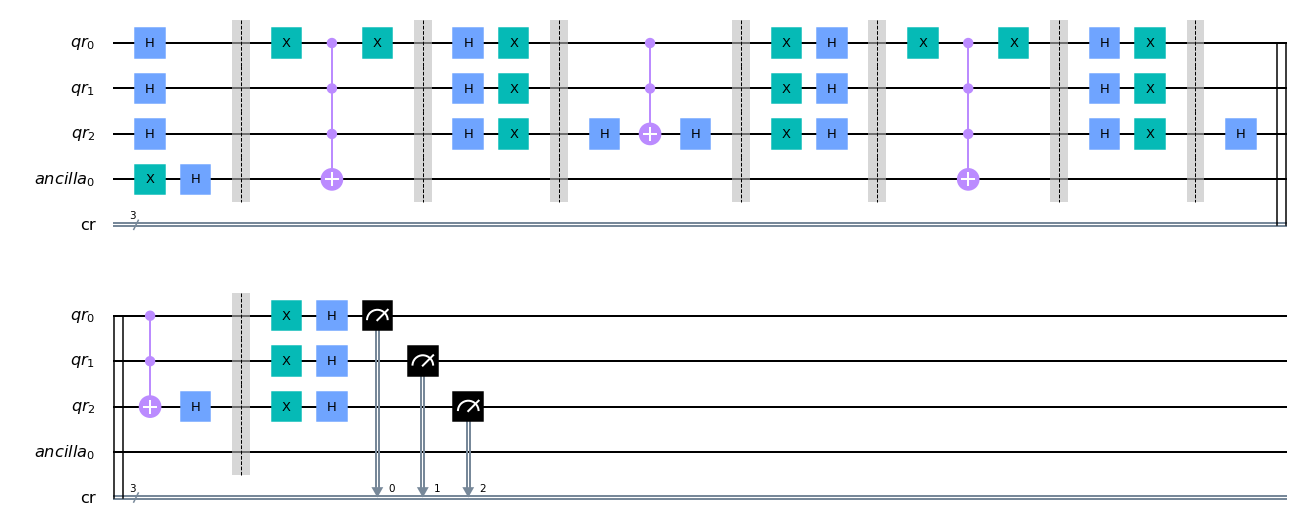

In [14]:
qc = Grover_QC(2)
qc.draw('mpl')

In [13]:
from qiskit.visualization import plot_state_city
plot_state_city(vec)

QiskitError: 'Invalid input data format for DensityMatrix'

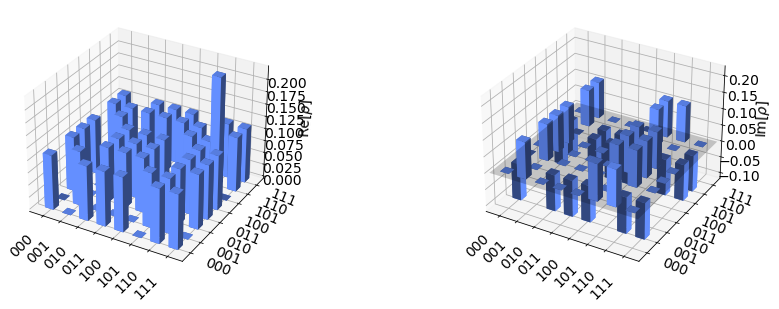

In [9]:
plot_state_city(desired_vector)

#### Iteration vs performance

In [22]:
sim_backend = Aer.get_backend('qasm_simulator')
x,y = list(range(20)), []
for i in range(20):
    cnts = Grover_test(sim_backend, i)
    shots = sum(cnts.values())
    y.append(cnts['110'] / shots)

Text(0, 0.5, 'ratio of correct result')

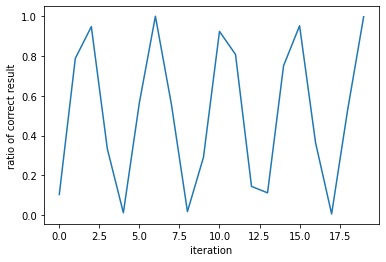

In [26]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('iteration')
plt.ylabel('ratio of correct result')

#### (d) multi-target oracle

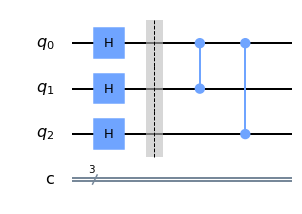

In [112]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.barrier()
qc.cz(0, 1)
qc.cz(0, 2)

qc.draw('mpl', filename='2-oracle')

In [36]:
state_sim = Aer.get_backend('statevector_simulator')
vec = execute(qc, state_sim).result().get_statevector()
print(vec)

[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339-0.j]


In [121]:
def multi_Grover_QC(n_ite=1):
    qr= QuantumRegister(3, 'qr')
    cr = ClassicalRegister(3, 'cr')
    qc = QuantumCircuit(qr, cr) #anc_qr, cr)

    qc.h(qr)
    
    for i in range(n_ite):
        qc.barrier()
        qc.cz(0, 2)
        qc.cz(1, 2)
        qc.cx(1, 0)

        qc.barrier()
        qc.h(qr)
        qc.x(qr)
        qc.barrier()
        qc.h(qr[2])
        qc.mct([qr[0], qr[1]], qr[2])
        qc.h(qr[2])
        qc.barrier()
        qc.x(qr)
        qc.h(qr)
    qc.measure(qr, cr)
    return qc
#     qc.draw('mpl')

In [142]:
execute(multi_Grover_QC(2), sim_backend).result().get_counts()

{'101': 492, '110': 532}

In [123]:
x = list(range(10))
ratio = []
for i in range(10):
    cnt = execute(multi_Grover_QC(i), sim_backend).result().get_counts()
    ratio.append((cnt['011'] + cnt['101'])/1024)

plt.plot(x, ratio)# , save_fig="2-Grover result")
# multi_Grover_QC(1).draw('mpl')

KeyError: '011'

### QFT

In [59]:
from math import pi


def qft(n, index):
    qr = QuantumRegister(n, 'q')
    cr = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qr,  cr)
    
    qc.h(qr)
    if index == 1:
        qc.rz(pi, 0)
    if index == 2:
        qc.rz(pi/2, 0)
        qc.ry(pi, 1)
    if index == 3:
        qc.rz(pi, 2)
        qc.rz(pi/2, 1)
        qc.rz(pi/4, 0)
    qc.barrier()
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(np.pi/float(2 ** (j-m)), m, j)
        qc.h(j)
    qc.measure(qr, cr)
    
    qc.name = "QFT"
    return qc

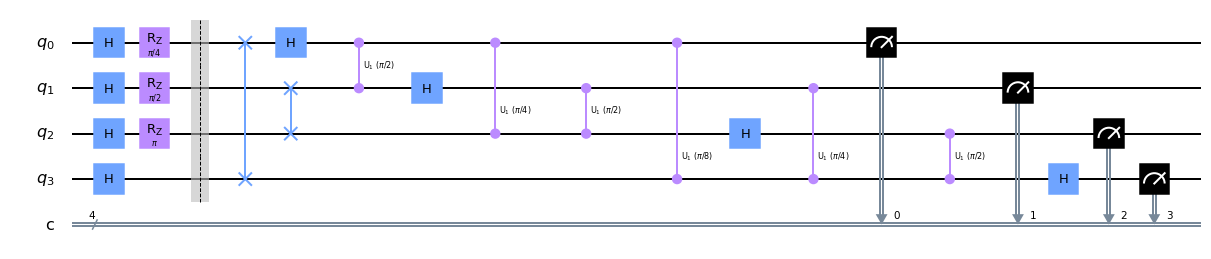

In [60]:
qft(4, 3).draw('mpl')

In [61]:
for i in [1,2,3]:
    print(execute(qft(4, i), sim_backend).result().get_counts())

{'1000': 1024}
{'1100': 1024}
{'1110': 1024}


### Period-finding

#### (a)

In [64]:
M, a = 15, 7
ys = []
x = 1
while True:
    x *= a
    x %= M
    if x in ys: break
    ys.append(x)

print(ys)

[7, 4, 13, 1]


In [65]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U


In [74]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U 
#to act on n_count = 8 # number of counting qubits
n_count = 8
a = 7 # a variable that can be adjusted later

# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x) 
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1") 
cr2 = ClassicalRegister(4, name="c2")

qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count): 
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2 ** q), [q] + [i+n_count for i in range(4)])
    
qc.measure(qr2, cr2)

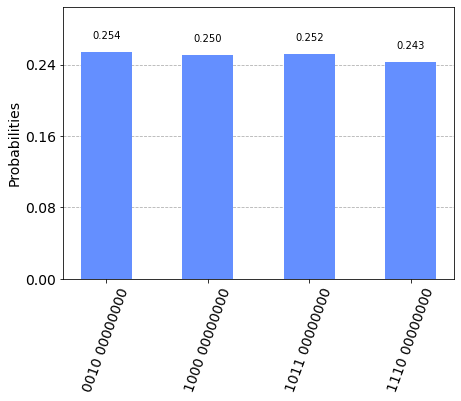

In [76]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [81]:
def inverse_bin_to_dec(s):
    s = s[::-1]
    return int(s, 2)
[inverse_bin_to_dec(i.split()[0]) for i in list(counts.keys())]  ## = 1,4,13,7

[4, 1, 13, 7]

#### Measure qr1 & qr2

In [82]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U 
#to act on n_count = 8 # number of counting qubits
n_count = 8
a = 7 # a variable that can be adjusted later

# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x) 
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1") 
cr2 = ClassicalRegister(4, name="c2")

qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count): 
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2 ** q), [q] + [i+n_count for i in range(4)])
    
qc.measure(qr1, cr1)
qc.measure(qr2, cr2)

In [83]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048*4).result()
counts = results.get_counts()

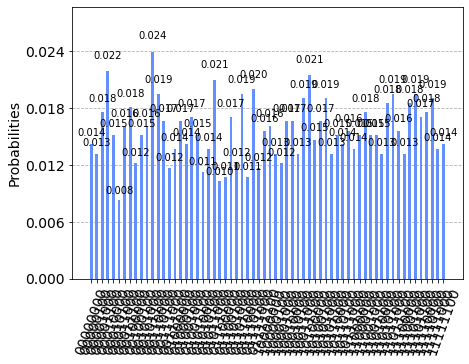

In [96]:
result = {'0010': {}, '1000': {}, '1011': {}, '1110': {}}

for k, v in counts.items():
    k2, k1 = k.split()
    if k1 in result[k2].keys():
        result[k2][k1] += v
    else:
        result[k2][k1] = v
# print(result)

idx = list(result.keys())
plot_histogram(result[idx[1]])

In [88]:
list(counts.keys())[1].split()[0]

'0010'

#### Plus inverse QFT

In [97]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc


In [99]:
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U 
#to act on n_count = 8 # number of counting qubits
n_count = 8
a = 7 # a variable that can be adjusted later

# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x) 
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1") 
cr2 = ClassicalRegister(4, name="c2")

qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# Initialize counting qubits in uniform superposition
for q in range(n_count): 
    qc.h(q)
    
# And ancilla register in state |1>
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod15(a, 2 ** q), [q] + [i+n_count for i in range(4)])
    
qc.measure(qr2, cr2)

#Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count)) # Measure circuit
qc.measure(range(n_count), range(n_count))

In [100]:
cnts = execute(qc, sim_backend).result().get_counts()

In [106]:
result = {4: {}, 1: {}, 13: {}, 7: {}}

for k, v in cnts.items():
    k2, k1 = k.split()
    k2 = inverse_bin_to_dec(k2)
    k1 = int(k1, 2)
    if k1 in result[k2].keys():
        result[k2][k1] += v
    else:
        result[k2][k1] = v
print(result)

idx = list(result.keys())
# plot_histogram(result[idx[1]])

{4: {0: 71, 64: 67, 128: 71, 192: 61}, 1: {0: 61, 64: 68, 128: 52, 192: 55}, 13: {0: 80, 64: 62, 128: 69, 192: 63}, 7: {0: 58, 64: 52, 128: 62, 192: 72}}


In [109]:
import pandas as pd

rows, measured_phases = [], []
for output in counts:
    output = output.split()[1]
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append(["%s(bin) = %i(dec)" % (output, decimal), 
                 "%i/%i = %.2f" % (decimal, 2**n_count, phase)])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)


              Register Output           Phase
0      00000010(bin) = 2(dec)    2/256 = 0.01
1      00000110(bin) = 6(dec)    6/256 = 0.02
2     00001010(bin) = 10(dec)   10/256 = 0.04
3     00001110(bin) = 14(dec)   14/256 = 0.05
4     00010010(bin) = 18(dec)   18/256 = 0.07
..                        ...             ...
251  11101101(bin) = 237(dec)  237/256 = 0.93
252  11110001(bin) = 241(dec)  241/256 = 0.94
253  11110101(bin) = 245(dec)  245/256 = 0.96
254  11111001(bin) = 249(dec)  249/256 = 0.97
255  11111101(bin) = 253(dec)  253/256 = 0.99

[256 rows x 2 columns]


In [111]:
from fractions import Fraction

rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)


        Phase Fraction  Guess for r
0    0.007812      0/1            1
1    0.023438      0/1            1
2    0.039062     1/15           15
3    0.054688     1/15           15
4    0.070312     1/14           14
..        ...      ...          ...
251  0.925781    12/13           13
252  0.941406    14/15           15
253  0.957031    14/15           15
254  0.972656      1/1            1
255  0.988281      1/1            1

[256 rows x 3 columns]
